In [2]:
from numpy.linalg import norm
from numpy import cross, eye
from scipy.linalg import expm
import numpy as np
import pymatgen as p
import matplotlib.pyplot as plt
pi=np.pi
%matplotlib widget

In [45]:
from pymatgen.analysis.local_env import CrystalNN as nn


[{'site': PeriodicSite: I (2.9776, 5.9529, 3.0806) [0.4908, 0.9812, 0.5078],
  'image': (0, 0, 0),
  'weight': 1,
  'site_index': 3},
 {'site': PeriodicSite: I (5.9529, 2.9776, 3.0806) [0.9812, 0.4908, 0.5078],
  'image': (0, 0, 0),
  'weight': 1,
  'site_index': 4},
 {'site': PeriodicSite: I (3.0806, 2.9776, 5.9529) [0.5078, 0.4908, 0.9812],
  'image': (0, 0, 0),
  'weight': 1,
  'site_index': 2}]

In [52]:
cssii2=p.Structure.from_file("../Cssii2.cif")
struc1=cssii2.copy()
n=2
struc1.make_supercell([[n,0,0],[0,n,0],[0,0,n]])
dist=cssii2.get_distance(1,3)
for j,i in enumerate(struc1):
    if i.species_string=="Si":
#         print( [i["site_index"] for i in nn().get_nn_info(struc1,n=j)]  )
#         print("\n")

SyntaxError: unexpected EOF while parsing (<ipython-input-52-ce89efa76499>, line 9)

In [57]:
def get():
    cssii2=p.Structure.from_file("../Cssii2.cif")
    a=cssii2.lattice.abc[1]
    return a,[cssii2[1].coords,cssii2[2].coords,cssii2[3].coords,cssii2[4].coords]
get()


(6.06698,
 [array([3.1703004, 3.1703004, 3.1703004]),
  array([3.08059403, 2.97760098, 5.95287224]),
  array([2.97760098, 5.95287224, 3.08059403]),
  array([5.95287224, 2.97760098, 3.08059403])])

In [71]:
def transform(structure_given,angle=-180,phi=0,atom=1,inplace=False):
        structure=structure_given.copy()
        coor=[]
        if atom==1:
            pos=structure.get_neighbor_list(2.8,[structure[0]])[1]
            if 0 not in pos:
                pos=np.hstack((pos,0))
        else:
            pos=structure.get_neighbor_list(2.4,[structure[1]])[1]
            if 1 not in pos:
                pos=np.hstack((pos,1))
        #coord = (structure[3].coords+structure[5].coords+structure[6].coords+structure[8].coords)/4
        coord=np.array([structure[i].coords for i in pos]).mean(axis=0)
        structure.rotate_sites(pos,np.deg2rad(angle),[0,1,0],coord,to_unit_cell=True)
        structure.rotate_sites(pos,np.deg2rad(phi),[1,0,0],coord,to_unit_cell=True)
        #structure.to("cif","../structures/dipole_2.cif")
        return structure
#!open structures/dipole_2.cif

In [59]:
structure = p.Structure.from_file("../structures/final_dipoles.cif")
s=transform(structure,angle=180,atom=2)
!open ../structures/dipole_2.cif

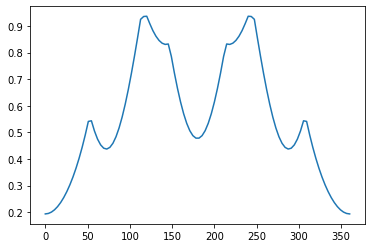

In [67]:
var=[]
structure = p.Structure.from_file("../structures/dipole_2.cif")
%matplotlib inline
for i in np.linspace(0,360,100):
    s=transform(structure,angle=0,phi=i,atom=2)
    nn=s.get_neighbor_list(8,[s[0]])
    var.append(np.var(np.sort(nn[-1][np.where(nn[1]>1)])[:6]))
plt.plot(np.linspace(0,360,100),var)
    

In [237]:
structure = p.Structure.from_file("structures/final_dipoles.cif")
s=transform(structure,angle=0,phi=0,atom=2)
nn=s.get_neighbor_list(4.5,[s[1],s[0]])
#nn[-1][nn[1] not in [0,1]]
print(nn[1][np.where((nn[1] != 1) & (nn[1] !=0) )])
print(nn[1])

[4 6 3 7 3 5 6 2 4 2 5 7]
[4 6 3 7 0 3 5 1 0 6 2 4 2 5 1 0 1 7]


In [202]:
# s.get_neighbor_list(2.8,[structure[0]])
dist=s.get_neighbor_list(4.5,[s[0],s[1]])[-1]
structure = p.Structure.from_file("structures/final_dipoles.cif")
dist_o=s.get_neighbor_list(4.5,[structure[0],structure[1]])[-1]
print(np.mean(dist),np.mean(dist_o))
print(np.var(dist),np.var(dist_o))

2.89808210661772 2.9216093717329867
0.3843253849389867 0.7207977402753062


In [238]:
def get_mean_var(structure,pos=[0,1],cutoff=4.5,type="mean"):
    nn=structure.get_neighbor_list(cutoff,[structure[pos[0]],structure[pos[1]]])
    dist=nn[-1][np.where(  (nn[1] != pos[0]) & (nn[1] !=pos[1])  )]
    if type=="mean":
        return np.mean(dist)
    else:
        return np.var(dist)

In [269]:
structure = p.Structure.from_file("structures/final_dipoles.cif")
s=transform(structure,angle=180,phi=0,atom=1,inplace=False)
print("Mean :",get_mean_var(structure),get_mean_var(s))
print("Var :",get_mean_var(structure,type="var"),get_mean_var(s,type="var"))

Mean : 3.121926003272383 2.89808210661772
Var : 0.6188056090598016 0.384325384938986


In [295]:
def transform(structure_given,angle=-180,phi=0,atom=1,inplace=False):
        structure=structure_given.copy()
        coor=[]
        if atom==1:
            pos=structure.get_neighbor_list(2.8,[structure[0]])[1]
            if 0 not in pos:
                pos=np.hstack((pos,0))
        else:
            pos=structure.get_neighbor_list(2.4,[structure[1]])[1]
            if 1 not in pos:
                pos=np.hstack((pos,1))
        #coord = (structure[3].coords+structure[5].coords+structure[6].coords+structure[8].coords)/4
        coord=np.array([structure[i].coords for i in pos]).mean(axis=0)
        structure.rotate_sites(pos,np.deg2rad(angle),[0,1,0],coord,to_unit_cell=False)
        structure.rotate_sites(pos,np.deg2rad(phi),[1,0,0],coord,to_unit_cell=False)
        structure.to("cif","structures/dipole_2.cif")
        return structure
# structure = p.Structure.from_file("structures/final_dipoles.cif")
# s=transform(structure,angle=180,phi=0,atom=1,inplace=False)
# s.to("cif","structures/rotated_dipoles.cif")
# structure = p.Structure.from_file("structures/rotated_dipoles.cif")
# s=transform(structure,angle=-180,phi=0,atom=2,inplace=False)
# !open structures/dipole_2.cif

In [297]:
structure = p.Structure.from_file("structures/rotated_dipoles.cif")
s=transform(structure,angle=180,phi=20,atom=1,inplace=False)
!open structures/dipole_2.cif

In [288]:
pos=structure.get_neighbor_list(2.8,[structure[1]])[1]
pos

array([4, 6, 3, 1], dtype=int64)

In [4]:
cssii2=p.Structure.from_file("structures/usethisFM.cif")
struc1=cssii2.copy()
n=1
struc1.make_supercell([[n,0,0],[0,n,0],[0,0,n]])


In [5]:
struc1.get_neighbor_list(2.5,[struc1[1]])

(array([0, 0, 0, 0], dtype=int64),
 array([4, 6, 3, 1], dtype=int64),
 array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]),
 array([2.43203754e+00, 2.43203754e+00, 2.38069051e+00, 4.44089210e-16]))

In [13]:
pos1=[]
x=struc1[0]
pos1.append(x.frac_coords)
for i in struc1.get_neighbors(x,2.5):
    pos1.append(i.frac_coords)
pos1=np.array(pos1).T

In [14]:
pos2=[]
x=struc1[1]
pos2.append(x.frac_coords)
for i in struc1.get_neighbors(x,2.5):
    pos2.append(i.frac_coords)
pos2=np.array(pos2).T

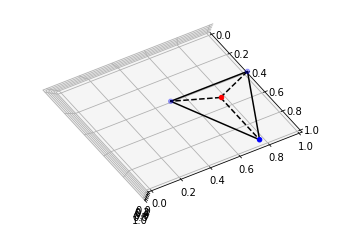

In [43]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pos1[0][1:],pos1[1][1:],pos1[2][1:],color="blue")
ax.scatter(pos1[0][0],pos1[1][0],pos1[2][0],color="red")


for i in range(1,4):
    ax.plot3D([pos1[0][0],pos1[0][i]],[pos1[1][0],pos1[1][i]],[pos1[2][0],pos1[2][i]],c="k",ls="--")
ax.plot3D([pos[0][i] for i in [1,2,3,1]],[pos[1][i] for i in [1,2,3,1]],[pos[2][i] for i in [1,2,3,1]],c="k")

# ax.scatter(pos2[0][1:],pos2[1][1:],pos2[2][1:],color="blue")
# ax.scatter(pos2[0][0],pos2[1][0],pos2[2][0],color="red")
ax.set_ylim(0,1)
ax.set_xlim(0,1)
ax.set_zlim(0,1)
ax.view_init(elev=90, azim=-30)
plt.show()

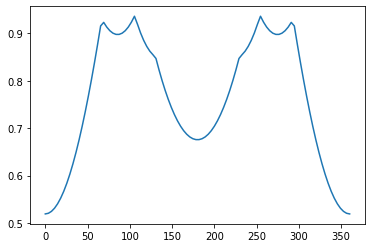

In [74]:
var=[]
structure = p.Structure.from_file("../structures/dipole_2.cif")
%matplotlib inline
for i in np.linspace(0,360,100):
    s=transform(structure,angle=0,phi=i,atom=2)
    nn=s.get_neighbor_list(8,[s[1]])
    var.append(np.var(np.sort(nn[-1][np.where(nn[1]>1)])[:6]))
plt.plot(np.linspace(0,360,100),var)
    

In [83]:
var=[]
structure = p.Structure.from_file("../structures/dipole_2.cif")
%matplotlib inline
for i in np.linspace(0,360,100):
    s=transform(structure,angle=0,phi=i,atom=2)
    nn=s.get_neighbor_list(8,[s[1]])
    var.append(np.var(np.sort(nn[-1][np.where(nn[1]>1)])[:6]))
plt.plot(np.linspace(0,360,100),var)

array([[ 0.,  0.,  0.],
       [-1.,  0.,  0.],
       [-1.,  0.,  0.]])

In [81]:
nn

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0], dtype=int64),
 array([2, 4, 7, 5, 0, 3, 2, 4, 2, 7, 6, 5, 0, 3, 3, 2, 6, 1, 4, 2, 4, 7,
        5, 0, 7, 2, 0, 4, 7, 6, 5, 1, 0, 6, 3, 1, 2, 7, 6, 5, 0, 3, 5, 2,
        0, 4, 1, 7, 6, 5, 1, 0], dtype=int64),
 array([[ 0., -1., -1.],
        [-1.,  0., -1.],
        [-1., -1., -1.],
        [-1., -1., -1.],
        [-1., -1., -1.],
        [ 0., -1.,  0.],
        [ 0., -1.,  0.],
        [-1.,  0.,  0.],
        [ 0.,  0., -1.],
        [-1.,  0., -1.],
        [-1.,  0., -1.],
        [-1.,  0., -1.],
        [-1.,  0., -1.],
        [ 0.,  1.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [-1.,  0.,  0.],
        [-1.,  0.,  0.],
        [ 1.,  0.,  0.],
        [ 1., -1., -1.],
        [ 0.,  0., -1.],
        [ 0., -1., -1.],
        [ 0., -1., -1.],
        [ 0., -1., -1.],
        [ 